In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.datasets import load_iris

knn \
naive_bayes \
linear model

In [32]:
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [33]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [34]:
iris=load_iris()
data=iris.data
target=iris.target

columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']

irisdf = pd.DataFrame(data, columns=columns)
irisdf['species'] = target

In [35]:
irisdf

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [36]:
irisdf.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [37]:
irisdf.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


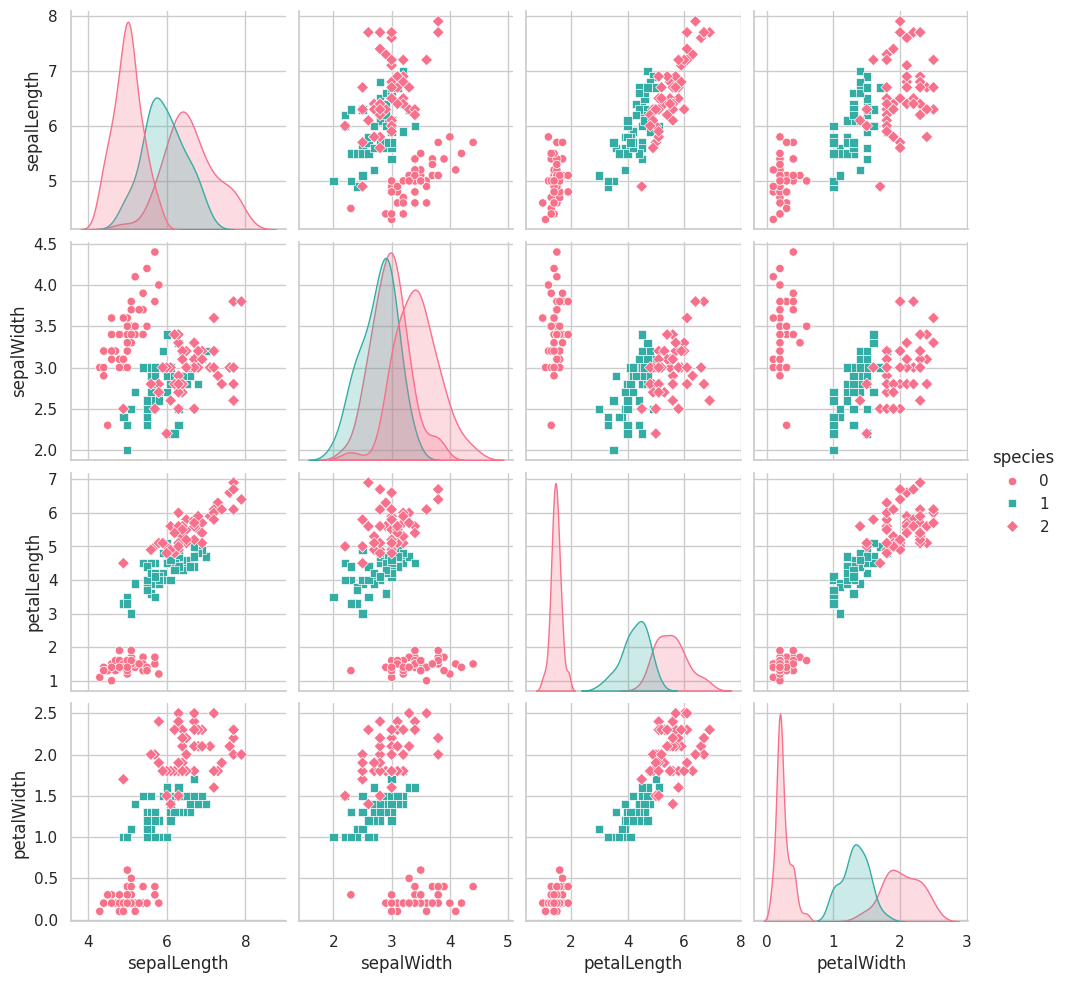

In [38]:
sns.pairplot(irisdf, hue="species", palette="husl", markers=["o", "s", "D"])

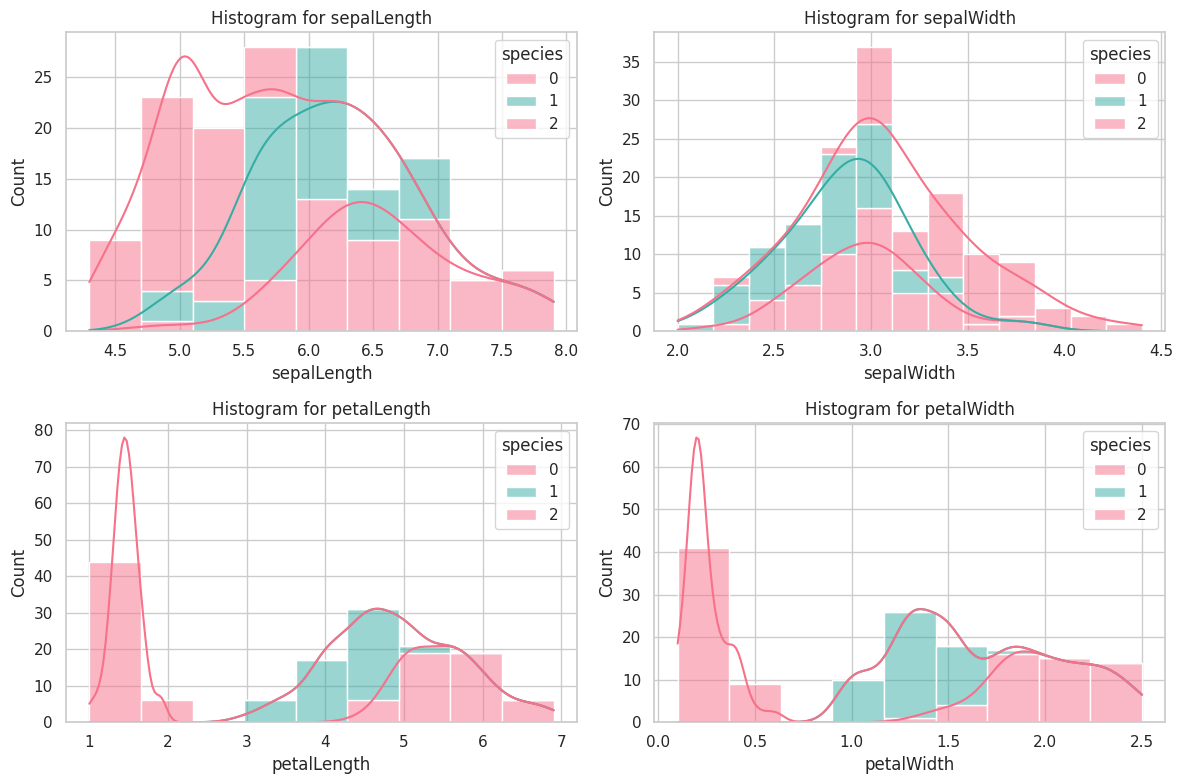

In [39]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate histograms for each variable with different colors for each species
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):  # enumerate starts index from 1
    plt.subplot(2, 2, i)  # assuming you have 4 columns in your dataset
    sns.histplot(irisdf, x=column, hue="species", multiple="stack", palette="husl", kde=True)
    plt.title(f'Histogram for {column}')

plt.tight_layout()  # Corrected function call
plt.show()

In [40]:
# scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# knn

In [41]:
scaler=StandardScaler()

In [42]:
selected_features = irisdf.drop(['species'],axis=1)

In [43]:
selected_features

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
scale_df=scaler.fit_transform(selected_features)


In [45]:
print(scale_df)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## train test split

In [46]:
x=pd.DataFrame(scale_df,columns=columns)
y=target

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
knn=KNeighborsClassifier()


## hyperparameter tuning

In [49]:
param_grid={
    'n_neighbors':[3,5,7,9],
    'p':[1,2,3,4],
    'weights':['uniform','distance']
}


In [50]:
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy') 


In [51]:
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [52]:
knn=KNeighborsClassifier(n_neighbors=7,
                         p=1,
                         weights='uniform'
                            )

In [53]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7, p=1)

In [54]:
y_pred_train=knn.predict(xtrain)
y_pred_test=knn.predict(xtest)
acc_train=accuracy_score(y_pred_train,ytrain)
acc_test=accuracy_score(y_pred_test,ytest)
print('accuracy for train :',acc_train)
print('accuracy for test  :',acc_test)

accuracy for train : 0.95
accuracy for test  : 1.0


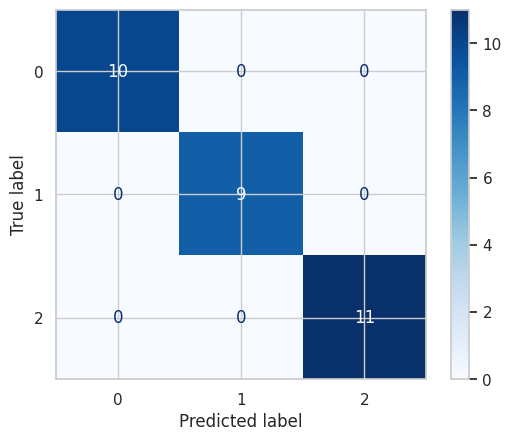

In [55]:
# Assuming 'knn' is your trained k-NN classifier

# Assuming 'y_test' is the true labels for the testing set
cm = confusion_matrix(ytest, y_pred_test)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

# Show the plot
plt.show()

In [57]:
from joblib import dump

## Save the model

In [58]:
# Save the model and scaler
dump(knn, 'trained_iris_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [1]:
# from joblib import load
# import numpy as np

# # Load the KNN model and MinMaxScaler
# knn = load('iris_trained.joblib')
# scaler = load('scaler.joblib')

# # Function to take user input and predict species
# def predict_species(sepal_length, sepal_width, petal_length, petal_width):
#     try:
#         # Create a NumPy array with the user input
#         user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

#         # Standardize the user input using the same scaler used for training
#         user_input_standardized = scaler.transform(user_input)

#         # Predict the species for the user input
#         predicted_species = knn.predict(user_input_standardized)

#         return predicted_species[0]

#     except ValueError as e:
#         print("Invalid input. Please enter numeric values.")

# # Example usage
# sepal_length = float(input("Enter sepal length: "))
# sepal_width = float(input("Enter sepal width: "))
# petal_length = float(input("Enter petal length: "))
# petal_width = float(input("Enter petal width: "))

# result = predict_species(sepal_length, sepal_width, petal_length, petal_width)
# if result is not None:
#     print("Predicted Species:", result)
